In [3]:
import numpy as np
import pandas as pd
l=pd.read_csv("Z:\DA\pizza_price_prediction_5thquestion.csv")
l


,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


# a)	Count the number of null values in the pizza dataset and replace null values with average of the concerned columns.

In [4]:
null_count=l.isnull().sum()
null_count
# for col in l.columns:
#     if null_count[col]>0:
#         avg=l[col].mean()
#         l[col].fillna(avg,inplace=True)
# l

company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

# b)	Calculate average price of pizza prepared by each company.

In [5]:
# for i in l["price_cad"]:
#     int(i[1:])
l['price']=[int(i[1:]) for i in l['price_cad']]
l.groupby('company')['price'].mean()

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price, dtype: float64

# c)	Find the companies, who prepared pizzas with different variants with same diameter.

In [6]:
c=l.groupby(["company","diameter"]).nunique()>1
l["company"]

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object

# d)	Which company has more pizzas? Show the result with graph

In [47]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'company vs no.of pizzas')

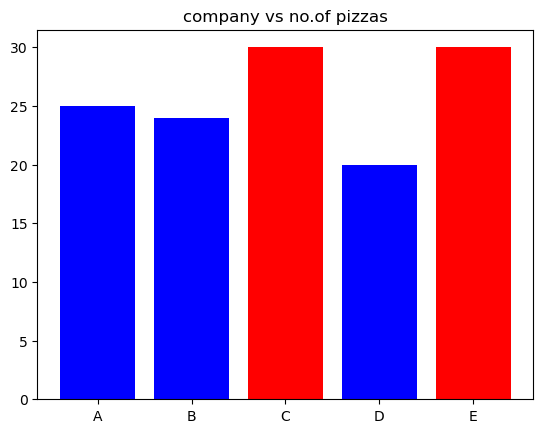

In [49]:
d1=l.groupby("company")["variant"].count()
val=d1.max()
col=['red' if i==val else 'blue' for i in d1]
plt.bar(d1.index,d1,color=col)
plt.title("company vs no.of pizzas")

# e)	Check whether the pizza data set contains null value or not. /Count the no. of null values in the pizza dataset./ Find the number of missing data points per column.


In [7]:
print("no.of null values:",l.isnull().sum().sum())

no.of null values: 0


# f)	Rename the column price_cad as price.


In [17]:
l.rename(columns={"price_cad":"price"},inplace=True)
l

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no,25
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,22
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30
...,...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes,11
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes,14
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes,17
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes,12


# g)	Identify the number of companies in each category 

In [9]:
l.groupby("variant")["company"].nunique()

variant
BBQ_meat_fiesta      2
BBQ_sausage          1
american_classic     1
american_favorite    1
classic              3
crunchy              3
double_decker        3
double_mix           2
double_signature     1
extravaganza         1
gournet_greek        1
italian_veggie       1
meat_eater           1
meat_lovers          2
neptune_tuna         1
new_york             3
spicy tuna           1
spicy_tuna           1
super_supreme        1
thai_veggie          1
Name: company, dtype: int64

# h)	Identify which type of pizza is more expensive

In [101]:
l['price'].max()


price    $30 
price      30
dtype: object

# i)	Find diameter of jumbo size pizza.

In [51]:
l[l["size"]=="jumbo"]["diameter"]


0     22.0
1     20.0
4     18.0
5     18.5
6     16.0
10    18.5
11    16.0
15    18.5
16    16.0
20    22.0
21    18.5
79    18.5
80    16.0
84    22.0
85    18.5
Name: diameter, dtype: float64

# j)	Any jumbo pizza with diameter less than 16 exists, remove such rows.

In [73]:
#l['diameter']=[float(i[:-5]) for i in l['diameter']]
l2=l[l['diameter']<16.0].index
l.drop(l2)


,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,$30,22.0,chicken,double_signature,jumbo,yes,yes,no,30
1,A,$30,20.0,papperoni,double_signature,jumbo,yes,yes,no,30
2,A,$30,16.0,mushrooms,double_signature,reguler,yes,yes,yes,30
4,A,$30,18.0,mozzarella,double_signature,jumbo,yes,no,yes,30
5,A,$30,18.5,black_papper,american_favorite,jumbo,no,no,yes,30
6,A,$30,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes,30
10,A,$30,18.5,mozzarella,super_supreme,jumbo,no,no,no,30
11,A,$30,16.0,black_papper,super_supreme,jumbo,yes,yes,no,30
15,A,$30,18.5,mozzarella,meat_lovers,jumbo,no,yes,yes,30
16,A,$30,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes,30


# k)	Calculate average price of a pizza prepared by company A.

In [42]:
l[l['company']=='A']['price'].mean()

19.6

# l)	Find the mean of the diameter and average price of pizzas prepared by company C.

In [74]:
l[l['company']=='C']['diameter'].mean()

11.5

# m)	Find the companies, who prepared pizzas with different variants with same diameter

In [78]:
l.groupby(['company','diameter']).filter(lambda x:x['variant'].nunique()>1)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,$30,22.0,chicken,double_signature,jumbo,yes,yes,no,30
2,A,$30,16.0,mushrooms,double_signature,reguler,yes,yes,yes,30
3,A,$30,14.0,smoked_beef,double_signature,reguler,yes,no,yes,30
5,A,$30,18.5,black_papper,american_favorite,jumbo,no,no,yes,30
6,A,$30,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes,30
...,...,...,...,...,...,...,...,...,...,...
124,E,$30,8.5,tuna,spicy tuna,small,yes,yes,yes,30
125,E,$30,12.0,tuna,spicy tuna,medium,yes,yes,yes,30
126,E,$30,14.0,tuna,spicy tuna,large,yes,yes,yes,30
127,E,$30,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes,30


# n)	Find the pizza variant with extra_mushrooms and topping with chicken.

In [25]:
n1=l[l["topping"]=="chicken"]
n1[n1["extra_mushrooms"]=="yes"]["variant"]

17       meat_lovers
20        double_mix
22        double_mix
29          new_york
30     double_decker
32           classic
37           classic
84        double_mix
86        double_mix
88        double_mix
90           classic
93          new_york
101          classic
107          classic
112          classic
114          classic
115          crunchy
Name: variant, dtype: object

# o)	What is the most expensive pizza in each company?

In [99]:
id1=l.groupby('company')['price'].max()
id1

,price,price
company,,
A,$30,30
B,$30,30
C,$30,30
D,$30,30
E,$30,30


# p)	Which company has more pizzas on the menu? Show the result with graph

Text(0.5, 1.0, 'company vs no.of pizzas')

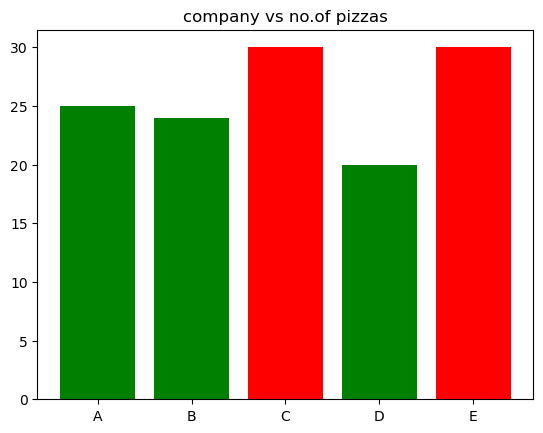

In [93]:
d1=l.groupby('company')['variant'].count()
val=d1.max()
col=['red' if i==val else 'green' for i in d1]
plt.bar(d1.index,d1,color=col)
plt.title("company vs no.of pizzas")

# q)	What is the average price of pizza in each company?

In [94]:
l['price']=[int(i[1:]) for i in l['price']]
l.groupby('company')['price'].mean()

ValueError: invalid literal for int() with base 10: 'rice'